# Notebook 1 — Automatic Classification
## 1. Introduction

> This first notebook of Project 02 focuses on the application of **automatic classification** techniques to sports data, using a historical dataset of NFL Super Bowl games.
>
> The main goal of this notebook is to develop machine learning models capable of **classifying a Super Bowl game** based on defined criteria, such as:
>
> - predicting whether the winning team scored above a certain threshold;
>
> - classifying games as competitive or one-sided;
>
> - predicting categories related to game performance based on available variables.
>
> This notebook demonstrates the ability to apply supervised machine learning methods, prepare data for classification, compare multiple algorithms, and interpret model results in a real sports context.

**Group members:**
- Pedro Ribeiro — student number 27960  
- Ricardo Fernandes — student number 27961  
- Carolina Branco — student number 27983  
- João Barbosa — student number 27964  
- Diogo Abreu — student number 27975  

## 2. Datasets
### 2.1 Dataset Source

The dataset used in this notebook comes from Kaggle, referenced in the project **“Superbowl History Analysis.”** 

The link to the dataset is the following one: https://www.kaggle.com/code/ahmadjaved097/superbowl-history-analysis/notebook

### 2.2 Dataset Description

The dataset includes detailed information for every Super Bowl played between 1967 and 2020.
It contains attributes such as:

- Game date

- Super Bowl identifier

- Winning and losing teams

- Points scored by each team

- MVP of the game

- Stadium, city, and state where the game was hosted

- Approximate number of records: ~54, one for each Super Bowl.

### 2.3 Metadata

| Attribute | Type | Description | 
|----------|--------------|--------|
| Date | Date | Date of the Super Bowl | 
| SB | Categorical | Official Super Bowl identifier |
| Winner | Categorical | Winning team |
| Winner Pts | Numeric | Points scored by the winner |
| Loser | Categorical | Losing team |
| Loser Pts | Numeric | Points scored by the loser |
| MVP | Categorical | Most Valuable Player of the game |
| Stadium | Categorical | Stadium hosting the game |
| City | Categorical | City of the stadium |
| State | Categorical | State of the stadium |

## 3. Exploratory Data Analysis (EDA)

The exploratory analysis in this notebook aims to understand the behavior of the variables that will feed the classification models.

### 3.1 Import Required Libraries


In [30]:
# Linear algebra and data processing
import numpy as np
import pandas as pd

# Graphics / Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Utils
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Load dataset locally (ensure the CSV is in the same folder as the notebook)
df = pd.read_csv("superbowl.csv")   

### 3.2 Load and Check Data

Below is a description of the main variables in the Super Bowl dataset:

- **Date:** The date on which the Super Bowl was played

- **SB:** Identifier for the Super Bowl edition (e.g., “XL”, “LIV”)

- **Winner:** Name of the team that won the game

- **Winner Pts:** Points scored by the winning team

- **Loser:** Name of the team that lost the game

- **Loser Pts:** Points scored by the losing team

- **MVP:** Player awarded “Most Valuable Player”

- **Stadium:** Name of the stadium where the game was held

- **City:** Host city

- **State:** Host state

In [32]:
# Load the Super Bowl dataset

superbowl_df = pd.read_csv('superbowl.csv')  

print("Number of rows in the dataset:", len(superbowl_df))

Number of rows in the dataset: 54


### 3.3 Variable Description

In [33]:
# Print top examples of the dataset
superbowl_df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [34]:
# Display basic information about the DataFrame
print(superbowl_df.info())

# Display descriptive statistics for numerical features
print(superbowl_df.describe())

# Display unique values for categorical features
for column in superbowl_df.columns:
    if superbowl_df[column].dtype == object:
        print(f"\nUnique values for {column}:")
        print(superbowl_df[column].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        54 non-null     object
 1   SB          54 non-null     object
 2   Winner      54 non-null     object
 3   Winner Pts  54 non-null     int64 
 4   Loser       54 non-null     object
 5   Loser Pts   54 non-null     int64 
 6   MVP         54 non-null     object
 7   Stadium     54 non-null     object
 8   City        54 non-null     object
 9   State       54 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.3+ KB
None
       Winner Pts  Loser Pts
count   54.000000  54.000000
mean    30.111111  16.203704
std      9.766455   7.413348
min     13.000000   3.000000
25%     23.250000  10.000000
50%     30.500000  17.000000
75%     35.000000  21.000000
max     55.000000  33.000000

Unique values for Date:
['Feb 2 2020' 'Feb 3 2019' 'Feb 4 2018' 'Feb 5 2017' 'Feb 7 2016'
 'Feb 1 20

### 3.4 Univariate Variable Analysis - Categorical Variables

In [35]:
# Get the categorical variables from the Super Bowl dataset
categorical_features = [feature for feature in superbowl_df.columns if superbowl_df[feature].dtype == object]
print("Categorical features:", categorical_features)

Categorical features: ['Date', 'SB', 'Winner', 'Loser', 'MVP', 'Stadium', 'City', 'State']


In [36]:
def bar_plot(variable):
    """
        input: variable name, e.g., "Winner"
        output: bar plot & value counts
    """
    # get the feature
    var = superbowl_df[variable]
    # count number of categorical variable values
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values, rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable, varValue))

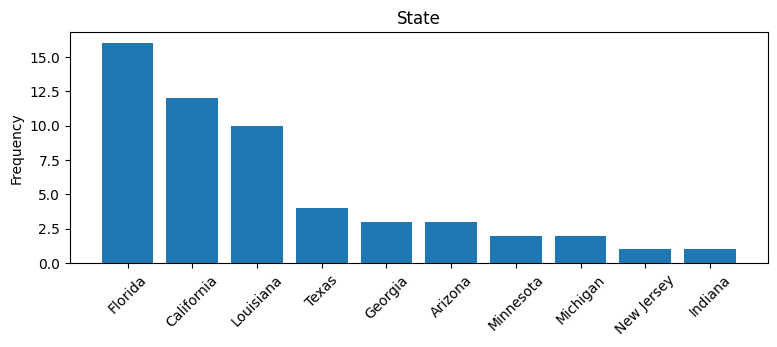

State:
State
Florida       16
California    12
Louisiana     10
Texas          4
Georgia        3
Arizona        3
Minnesota      2
Michigan       2
New Jersey     1
Indiana        1
Name: count, dtype: int64


In [37]:
# Plot categorical features with less than 20 distinct values
for cf in categorical_features:
    if superbowl_df[cf].nunique() < 20:
        bar_plot(cf)

In [38]:
# Print value counts for categorical features with 19 or more distinct values
for cf in categorical_features:
    if superbowl_df[cf].nunique() >= 19:
        print(f"\n{cf} value counts:\n")
        print(superbowl_df[cf].value_counts())



Date value counts:

Date
Feb 2 2020     1
Feb 3 2019     1
Feb 4 2018     1
Feb 5 2017     1
Feb 7 2016     1
Feb 1 2015     1
Feb 2 2014     1
Feb 3 2013     1
Feb 5 2012     1
Feb 6 2011     1
Feb 7 2010     1
Feb 1 2009     1
Feb 3 2008     1
Feb 4 2007     1
Feb 5 2006     1
Feb 6 2005     1
Feb 1 2004     1
Jan 26 2003    1
Feb 3 2002     1
Jan 28 2001    1
Jan 30 2000    1
Jan 31 1999    1
Jan 25 1998    1
Jan 26 1997    1
Jan 28 1996    1
Jan 29 1995    1
Jan 30 1994    1
Jan 31 1993    1
Jan 26 1992    1
Jan 27 1991    1
Jan 28 1990    1
Jan 22 1989    1
Jan 31 1988    1
Jan 25 1987    1
Jan 26 1986    1
Jan 20 1985    1
Jan 22 1984    1
Jan 30 1983    1
Jan 24 1982    1
Jan 25 1981    1
Jan 20 1980    1
Jan 21 1979    1
Jan 15 1978    1
Jan 9 1977     1
Jan 18 1976    1
Jan 12 1975    1
Jan 13 1974    1
Jan 14 1973    1
Jan 16 1972    1
Jan 17 1971    1
Jan 11 1970    1
Jan 12 1969    1
Jan 14 1968    1
Jan 15 1967    1
Name: count, dtype: int64

SB value counts:

SB
LIV (54)

### 3.4 Univariate Variable Analysis - Numerical variables

In [39]:
# Function to visualize frequency and distribution of numerical features
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(superbowl_df[variable], bins=50, color='skyblue', edgecolor='black')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution with histogram")
    plt.show()

In [40]:
# Get the numerical variables from superbowl_df
numerical_features = [feature for feature in superbowl_df.columns if superbowl_df[feature].dtype != object]
print("Numerical features:", numerical_features)

Numerical features: ['Winner Pts', 'Loser Pts']


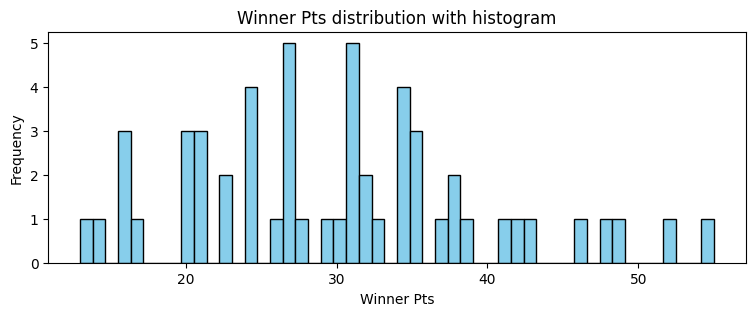

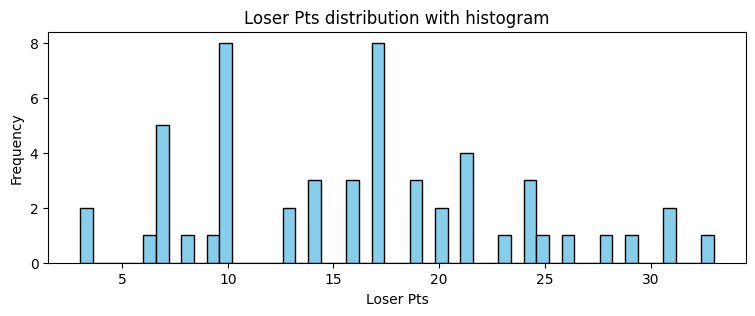

In [41]:
# Remove columns that are not useful for distribution plots (e.g., SB identifier)
removed_nf = ["SB"]  # adjust if there are others to remove
for nf in numerical_features:
    if nf not in removed_nf:
        plot_hist(nf)

### 3.5 Find missing values

In [42]:
# Check missing values for a specific column, e.g., MVP
print(f'MVP has {superbowl_df["MVP"].isnull().sum()} null values')

# Display the rows where MVP is missing
superbowl_df[superbowl_df["MVP"].isnull()].head()


MVP has 0 null values


,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State


### 3.6 Creating Target Variables for Classification

In the original Super Bowl dataset, there is no column indicating whether a game had a high score or whether it was competitive.
Since our goal in **Notebook 1 – Automatic Classification** is to predict a target variable, we need to create derived features that represent these concepts.

1. **HighScore**

- This variable classifies games where the winning team scored **30 or more points** as a “high scoring game.”

- It will be a **binary variable**:

    - 1 → Winner scored ≥30 points

    - 0 → Winner scored <30 points

This allows us to train a classification model to **predict if a game is likely to be high scoring** based on other game attributes.

2. **Competitive**

- This variable measures **how close the game was** by computing the **point difference** between the winner and the loser.

- A game is considered **competitive** if the point difference is **10 points or less**.

- It will also be a **binary variable**:

    - 1 → Point difference <= 10 → competitive game

    - 0 → Point difference > 10 → one-sided game

#### Why create these variables?

- They provide **meaningful targets** for supervised classification models.

- They allow us to explore **bivariate relationships** and patterns in the data.

- They make it possible to answer practical questions such as:

    - Which teams are more likely to be involved in competitive games?

    - Which conditions lead to high scoring games?

In [43]:
# Create a target variable: HighScore if winner scored >= 30 points
superbowl_df['HighScore'] = (superbowl_df['Winner Pts'] >= 30).astype(int)

# Create another target: Competitive if point difference <= 10
superbowl_df['PointDiff'] = superbowl_df['Winner Pts'] - superbowl_df['Loser Pts']
superbowl_df['Competitive'] = (superbowl_df['PointDiff'] <= 10).astype(int)

# Check the first rows
superbowl_df[['Winner Pts', 'Loser Pts', 'PointDiff', 'HighScore', 'Competitive']].head()


,Winner Pts,Loser Pts,PointDiff,HighScore,Competitive
0,31,20,11,1,0
1,13,3,10,0,1
2,41,33,8,1,1
3,34,28,6,1,1
4,24,10,14,0,0


### 3.7 Basic Data Analysis 

#### Bivariate analysis

- Winner - HighScore
- State - HighScore
- Stadium - HighScore
- City - HighScore


In [44]:
# Winner vs HighScore
print("Winner vs HighScore")
display(pd.crosstab(superbowl_df['Winner'], superbowl_df['HighScore']))

# State vs HighScore
print("\nState vs HighScore")
display(pd.crosstab(superbowl_df['State'], superbowl_df['HighScore']))

# Stadium vs HighScore
print("\nStadium vs HighScore")
display(pd.crosstab(superbowl_df['Stadium'], superbowl_df['HighScore']))

# City vs HighScore
print("\nCity vs HighScore")
display(pd.crosstab(superbowl_df['City'], superbowl_df['HighScore']))

Winner vs HighScore


HighScore,0,1
Winner,,
Baltimore Colts,1,0
Baltimore Ravens,0,2
Chicago Bears,0,1
Dallas Cowboys,3,2
Denver Broncos,1,2
Green Bay Packers,0,4
Indianapolis Colts,1,0
Kansas City Chiefs,1,1
Los Angeles Raiders,0,1



State vs HighScore


HighScore,0,1
State,,
Arizona,3,0
California,3,9
Florida,8,8
Georgia,2,1
Indiana,1,0
Louisiana,6,4
Michigan,2,0
Minnesota,0,2
New Jersey,0,1



Stadium vs HighScore


HighScore,0,1
Stadium,,
Alltel Stadium,1,0
Cowboys Stadium,0,1
Dolphin Stadium,1,0
Ford Field,1,0
Georgia Dome,1,1
Hard Rock Stadium,0,1
Jack Murphy Stadium,0,1
Joe Robbie Stadium,1,1
Levi's Stadium,1,0



City vs HighScore


HighScore,0,1
City,,
Arlington,0,1
Atlanta,2,1
Detroit,1,0
East Rutherford,0,1
Glendale,2,0
Houston,1,2
Indianapolis,1,0
Jacksonville,1,0
Los Angeles,1,1


### 3.7 Visualization

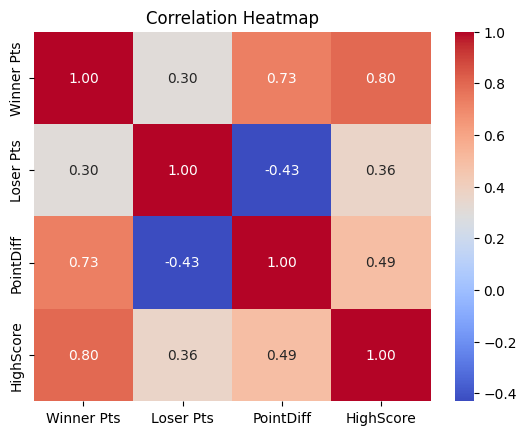

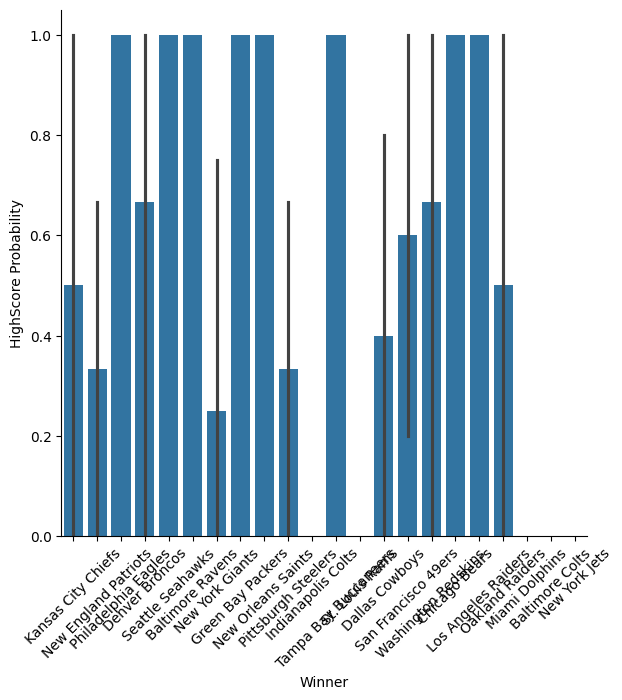

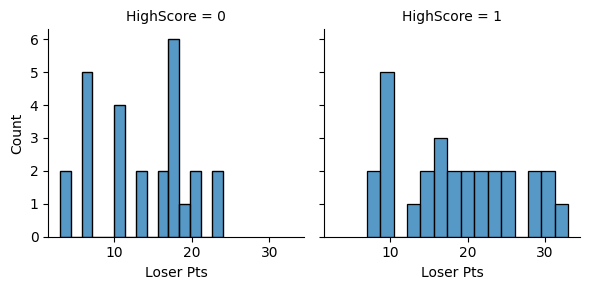

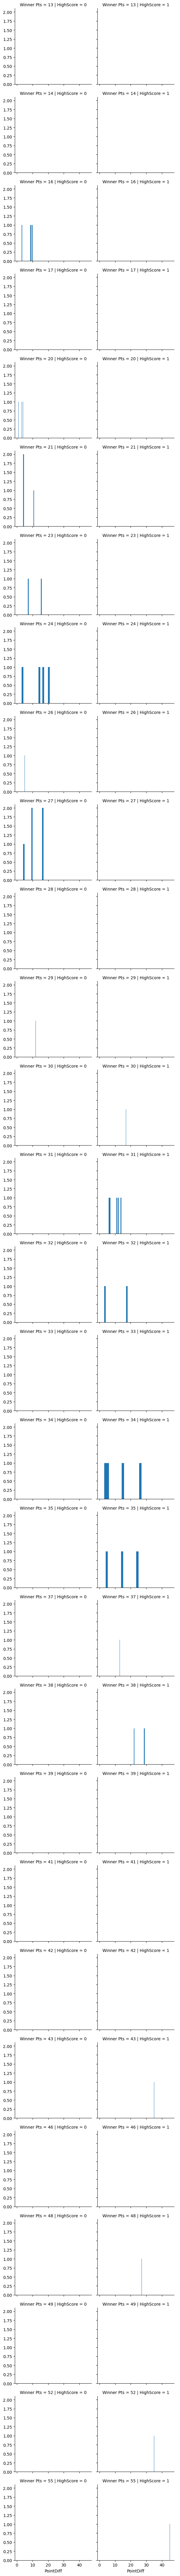

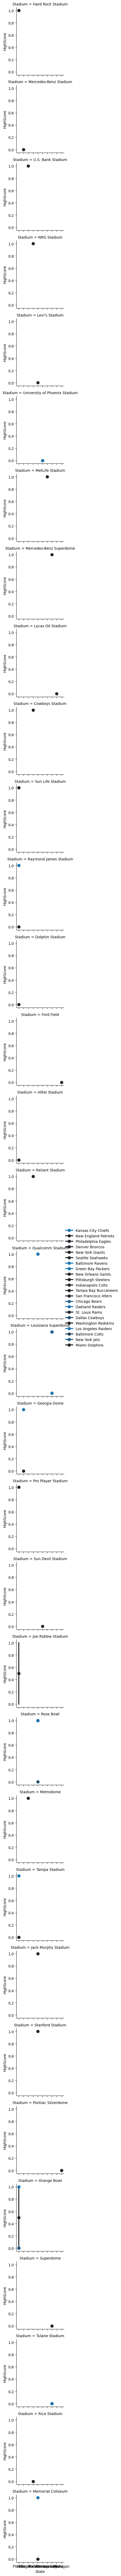

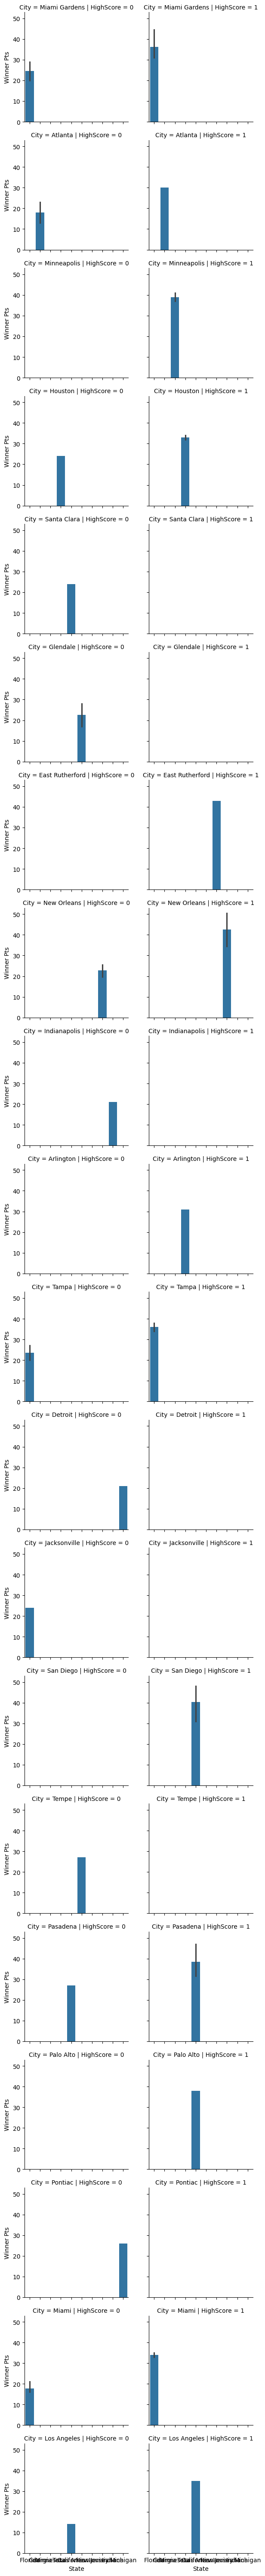

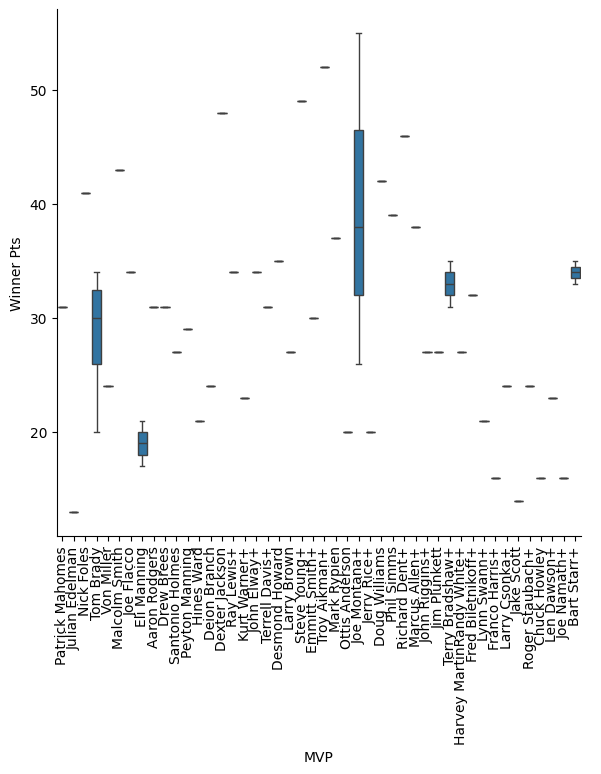

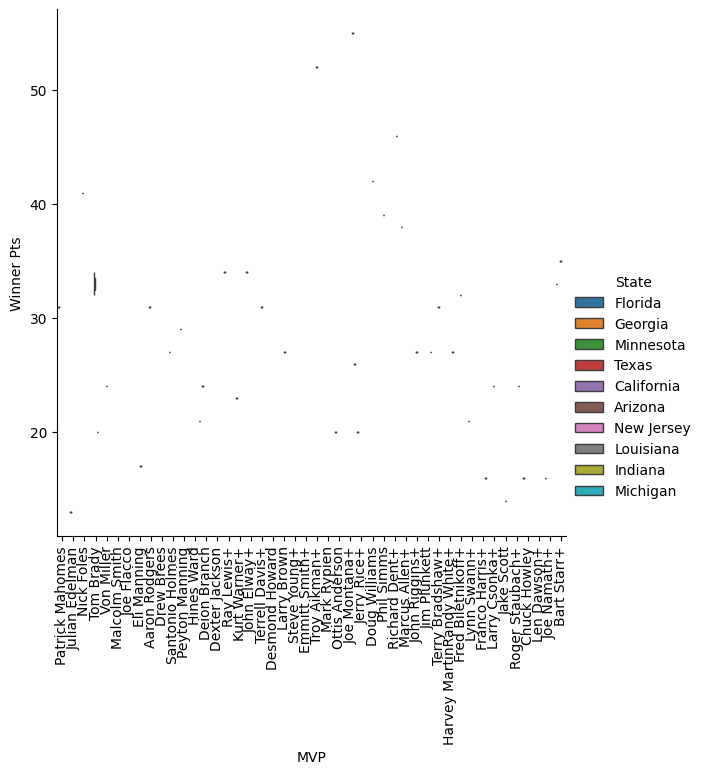

In [45]:
# Correlation Between Winner Pts, Loser Pts, PointDiff, HighScore
numerical_features = ["Winner Pts", "Loser Pts", "PointDiff", "HighScore"]
sns.heatmap(superbowl_df[numerical_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Winner Pts vs HighScore
g = sns.catplot(x="Winner", y="HighScore", data=superbowl_df, kind="bar", height=6)
g.set_ylabels("HighScore Probability")
plt.xticks(rotation=45)
plt.show()

# Loser Pts vs HighScore
g = sns.FacetGrid(superbowl_df, col="HighScore")
g.map(sns.histplot, "Loser Pts", bins=15)
plt.show()

# HighScore vs PointDiff
g = sns.FacetGrid(superbowl_df, col="HighScore", row="Winner Pts")
g.map(plt.hist, "PointDiff", bins=15)
g.add_legend()
plt.show()

# Stadium -- State -- HighScore
g = sns.FacetGrid(superbowl_df, row="Stadium")
g.map(sns.pointplot, "State", "HighScore", "Winner")
g.add_legend()
plt.show()

# City -- State -- Winner Pts -- HighScore
g = sns.FacetGrid(superbowl_df, row="City", col="HighScore")
g.map(sns.barplot, "State", "Winner Pts")
g.add_legend()
plt.show()

# MVP vs Winner Pts
sns.catplot(x="MVP", y="Winner Pts", data=superbowl_df, kind="box", height=6)
plt.xticks(rotation=90)

# MVP vs Winner Pts vs State
sns.catplot(x="MVP", y="Winner Pts", hue="State", data=superbowl_df, kind="box", height=6)
plt.xticks(rotation=90)

plt.show()

### 3.8 Data preparation

#### 3.8.1 Find and fill Missing Values

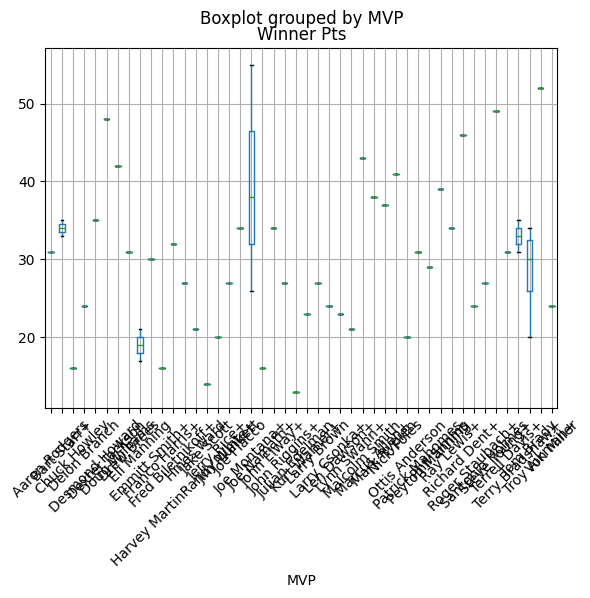

         Date        SB              Winner  Winner Pts                Loser  \
0  Feb 2 2020  LIV (54)  Kansas City Chiefs          31  San Francisco 49ers   

   Loser Pts              MVP            Stadium           City    State  \
0         20  Patrick Mahomes  Hard Rock Stadium  Miami Gardens  Florida   

   HighScore  PointDiff  Competitive  
0          1         11            0  


In [46]:
# Get variables with null values
superbowl_df.columns[superbowl_df.isnull().any()]

# List number of null values per variable
superbowl_df.isnull().sum()

# Check rows where MVP is null
superbowl_df[superbowl_df["MVP"].isnull()]

# Check Winner Pts distribution for missing MVPs
superbowl_df.boxplot(column="Winner Pts", by="MVP")
plt.xticks(rotation=45)
plt.show()

# Assign a placeholder to null MVP values
# Here we assign "Unknown" to games without a registered MVP
superbowl_df["MVP"] = superbowl_df["MVP"].fillna("Unknown")
superbowl_df[superbowl_df["MVP"].isnull()]

# Check other columns with missing values (example: Stadium or State)
superbowl_df[superbowl_df["Stadium"].isnull()]

# If needed, fill missing numerical values with mean or median
# Example for Loser Pts (if any nulls)
if superbowl_df["Loser Pts"].isnull().sum() > 0:
    superbowl_df["Loser Pts"] = superbowl_df["Loser Pts"].fillna(np.mean(superbowl_df["Loser Pts"]))

# Show the row for a specific Super Bowl (example SB number LIV)
print(superbowl_df[superbowl_df['SB'] == "LIV (54)"])


### 3.9 Feature Engineering

In the Super Bowl dataset, the MVP column contains the full name of the Most Valuable Player. To make this feature more useful for machine learning, we perform the following steps:

1. **Inspect the MVP column**

- We first look at the first few entries to understand the data.

2. **Create a simplified MVP group**

- Extract only the first name of the MVP, or use "Unknown" if the value is missing.

- This reduces the number of unique categories and simplifies analysis.

3. **Visualize the distribution**

- A count plot (sns.countplot) is used to see the frequency of each MVP_Group.

- This helps identify very rare categories.

4. **Group rare MVPs into "Other"**

- MVPs that appear less than twice are replaced with "Other".

- This reduces noise and prevents the model from overfitting to rare players.

5. **Visualize the cleaned MVP_Group**

- Another count plot shows the updated distribution after grouping rare MVPs.

6. **Analyze relationship with target variable (HighScore)**

- A bar plot shows the probability of a high scoring game for each MVP_Group.

- This helps understand which MVP groups are more likely associated with high scoring games.

7. **Remove the original MVP column**

- We keep only the simplified MVP_Group for modeling purposes.

8. **One-hot encoding**

- Convert MVP_Group into binary columns using one-hot encoding.

- This allows machine learning algorithms to use the categorical feature effectively.

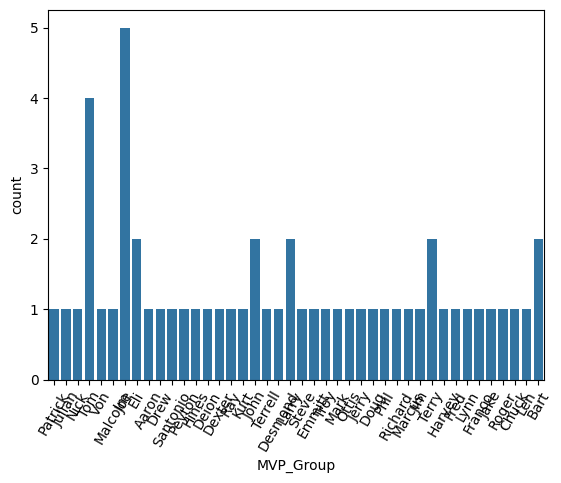

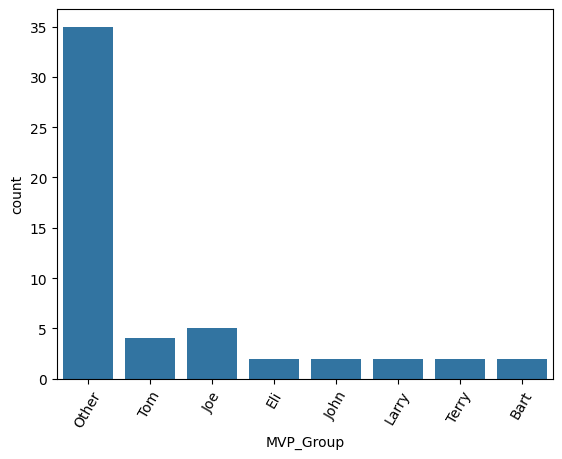

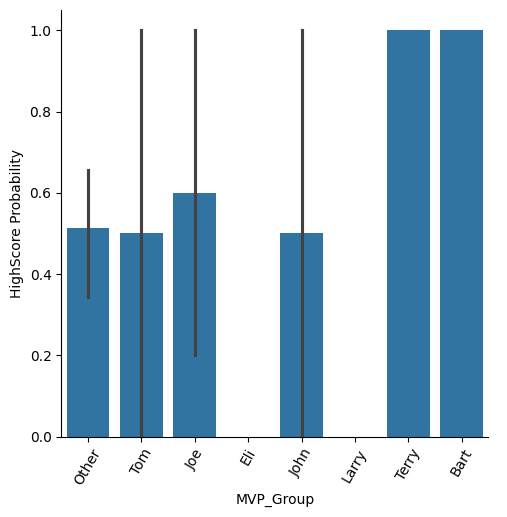

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,Stadium,City,State,HighScore,PointDiff,Competitive,MVP_Group_Bart,MVP_Group_Eli,MVP_Group_Joe,MVP_Group_John,MVP_Group_Larry,MVP_Group_Other,MVP_Group_Terry,MVP_Group_Tom
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Hard Rock Stadium,Miami Gardens,Florida,1,11,0,False,False,False,False,False,True,False,False
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Mercedes-Benz Stadium,Atlanta,Georgia,0,10,1,False,False,False,False,False,True,False,False
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,U.S. Bank Stadium,Minneapolis,Minnesota,1,8,1,False,False,False,False,False,True,False,False
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,NRG Stadium,Houston,Texas,1,6,1,False,False,False,False,False,False,False,True
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Levi's Stadium,Santa Clara,California,0,14,0,False,False,False,False,False,True,False,False


In [47]:
# Inspect first MVPs
superbowl_df["MVP"].head(10)

# Extract a simplified "MVP Group" (for example: only first name or group unknown)
superbowl_df["MVP_Group"] = [i.split(" ")[0] if i != "Unknown" else "Unknown" for i in superbowl_df["MVP"]]
superbowl_df["MVP_Group"].head(10)

# Count plot of MVP_Group
sns.countplot(x="MVP_Group", data=superbowl_df)
plt.xticks(rotation=60)
plt.show()

# Group rare MVPs into "Other" category (those appearing less than 2 times)
value_counts = superbowl_df["MVP_Group"].value_counts()
rare_mvps = value_counts[value_counts < 2].index
superbowl_df["MVP_Group"] = superbowl_df["MVP_Group"].replace(rare_mvps, "Other")

# Count plot after grouping
sns.countplot(x="MVP_Group", data=superbowl_df)
plt.xticks(rotation=60)
plt.show()

# Show probability of HighScore per MVP_Group
g = sns.catplot(x="MVP_Group", y="HighScore", data=superbowl_df, kind="bar")
g.set_ylabels("HighScore Probability")
plt.xticks(rotation=60)
plt.show()

# Remove original MVP column, just keep the simplified category
superbowl_df.drop(labels=["MVP"], axis=1, inplace=True)

# One-hot encoding MVP_Group
superbowl_df = pd.get_dummies(superbowl_df, columns=["MVP_Group"])
superbowl_df.head()


### 3.10 Outlier Detection

In [29]:
# Function to detect outliers based on IQR method
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c], 25)
        # 3rd quartile
        Q3 = np.percentile(df[c], 75)
        # Interquartile range
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Detect outlier indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)

    # Count occurrences and consider rows that are outliers in more than one feature
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers

# Columns to check for outliers
numerical_features = ["Winner Pts", "Loser Pts", "PointDiff"]

# Find outliers
outliers = superbowl_df.loc[detect_outliers(superbowl_df, numerical_features)]
display(outliers)

# Drop outliers
superbowl_df = superbowl_df.drop(detect_outliers(superbowl_df, numerical_features), axis=0).reset_index(drop=True)

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,Stadium,City,State,HighScore,PointDiff,Competitive,MVP_Group_Bart,MVP_Group_Eli,MVP_Group_Joe,MVP_Group_John,MVP_Group_Larry,MVP_Group_Other,MVP_Group_Terry,MVP_Group_Tom
